In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2 as cv
from PIL import Image 
import PIL


In [2]:
#Get the dataset
efigi_labels = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_labels.csv')

efigi_features_2key = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_features_2keypoints.csv')

efigi_sift_feature = pd.read_csv('../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_labels.csv')

In [3]:
# Check first dataset
efigi_labels.head()

,Unnamed: 0,PGCname,T,category_label
0,0,PGC0000212,1,2
1,1,PGC0000218,0,2
2,2,PGC0000243,-2,1
3,3,PGC0000255,9,2
4,4,PGC0000281,7,2


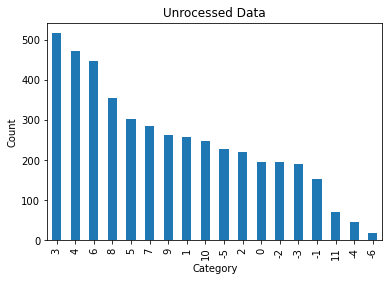

In [4]:

# Unprocessed data
efigi_labels['T'].value_counts().plot(kind='bar')
plt.title('Unrocessed Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


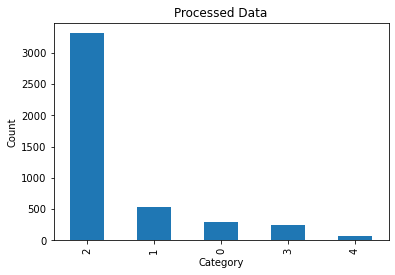

In [5]:
# Processed Data
efigi_labels['category_label'].value_counts().plot(kind='bar')
plt.title('Processed Data')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [6]:
# Check second dataset
efigi_features_2key

,Unnamed: 0,pgc_id,SIFT_0,SIFT_1,SIFT_2,SIFT_3,SIFT_4,SIFT_5,SIFT_6,SIFT_7,...,SIFT_246,SIFT_247,SIFT_248,SIFT_249,SIFT_250,SIFT_251,SIFT_252,SIFT_253,SIFT_254,SIFT_255
0,0,PGC0000212,6.0,1.0,0.0,0.0,0.0,0.0,2.0,24.0,...,0.0,1.0,1.0,1.0,1.0,9.0,15.0,4.0,3.0,3.0
1,1,PGC0000218,16.0,6.0,1.0,0.0,0.0,1.0,2.0,19.0,...,0.0,0.0,0.0,0.0,12.0,46.0,4.0,0.0,0.0,0.0
2,2,PGC0000243,11.0,0.0,0.0,0.0,0.0,0.0,7.0,72.0,...,0.0,0.0,0.0,0.0,9.0,62.0,22.0,0.0,0.0,0.0
3,3,PGC0000255,19.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,...,0.0,0.0,0.0,1.0,6.0,20.0,9.0,0.0,0.0,0.0
4,4,PGC0000281,5.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,107.0,76.0,36.0,2.0,8.0,3.0,1.0,3.0,70.0,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,4453,PGC0072806,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4454,4454,PGC0072922,9.0,0.0,0.0,0.0,0.0,0.0,14.0,33.0,...,0.0,0.0,0.0,2.0,3.0,14.0,28.0,0.0,0.0,0.0
4455,4455,PGC0072927,25.0,4.0,2.0,1.0,5.0,2.0,5.0,21.0,...,0.0,0.0,2.0,1.0,16.0,49.0,33.0,4.0,2.0,4.0
4456,4456,PGC0072930,3.0,0.0,0.0,0.0,0.0,0.0,5.0,36.0,...,0.0,0.0,0.0,0.0,5.0,36.0,4.0,0.0,0.0,0.0


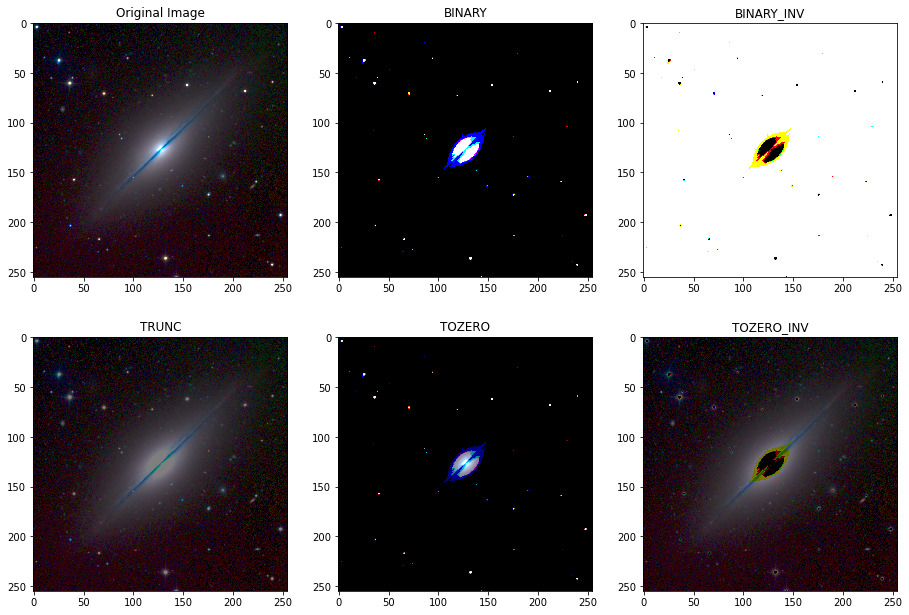

In [7]:
#Try out thresholding
img = cv.imread('../../galaxy_computer_vision_with_EFIGI_data/images/PGC0000218.png',1)


ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,th2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,th3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,th4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,th5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, th1, th2, th3, th4, th5]

fig, ax = plt.subplots(2,3)
index = 0
for i in range(2):
    for j in range(3):
        if index < 6:
            ax[i,j].imshow(images[index])
            ax[i,j].set_title(titles[index])
            index = index +1
plt.subplots_adjust(left = 1, bottom=2, right=3, top=4)   
plt.show()

In [8]:
unique, counts = np.unique(th2, return_counts =True)
frequencies = np.asarray((unique,counts)).T
print(frequencies)

[[     0   1872]
 [   255 193203]]


In [12]:
#Save the image
cv.imshow('Testing',th1)
cv.waitKey(0)

-1

In [11]:
cv.imwrite('../../galaxy_computer_vision_with_EFIGI_data/threshold_image/testing.png',th1)

True

In [21]:
# Loads the images
def load_images_from_folder(pgc_ids, image_root_path):
    images = []
    for pgc_id in pgc_ids:
        image = cv.imread(os.path.join(image_root_path, pgc_id + ".png"))
        if image is not None:
            images.append(image)
    return images

#Converts the images using binary thresholding
def convert_image_to_binary_threshold(image_root_path, label_dataset_path):

    #File path for the new images
    new_image_root_path = '../../galaxy_computer_vision_with_EFIGI_data/threshold_image/'

    #Gets the dataset that contains the image names
    label_dataframe = pd.read_csv(label_dataset_path)

    #Converts it to an array
    pgc_ids = np.array(label_dataframe["PGCname"])
    
    # Load images into a list.
    images = load_images_from_folder(pgc_ids, image_root_path)
   
    i = 0;
    for image in images:

        #Use binary thresholding
        ret,th1 = cv.threshold(image,127,255,cv.THRESH_BINARY)

        #Save the image to the new folder
        cv.imwrite(os.path.join(new_image_root_path,pgc_ids[i] + '.png'),th1)
        i = i +1;

In [22]:
convert_image_to_binary_threshold(r"C:\Users\serde\Desktop\COMP 442\Project\galaxy_computer_vision_with_EFIGI_data\images",  "../../galaxy_computer_vision_with_EFIGI_data/datasets/EFIGI_labels.csv")